In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import category_encoders as ce
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats
from sklearn.ensemble import RandomForestRegressor



Creat Data frame

In [134]:
df = pd.read_json('./output.json')
df


,car_name,car_model,car_price,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات,الدفع
0,كيا اوبتيما,موديل سنة 2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,NaN
1,كيا سورينتو,موديل سنة 2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,NaN
2,هونداي افانتي,موديل سنة 2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,None,None,نقدا فقط,للبيع فقط,None,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nجنطا...,NaN
3,فيات 127,موديل سنة 1982,5500,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,مُكيّف\nمسجل CD,NaN
4,بيجو 208,موديل سنة 2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,4+1,نقدا فقط,للبيع فقط,None,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nجنطات مغنيسيو...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,كيا مورننغ,موديل سنة 2015,45000,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000,4+1,إمكانية التقسيط,للبيع فقط,2,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nجنطات مغنيسيو...,NaN
6860,فورد ترانزيت,موديل سنة 2002,48000,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,00000,7+1,نقدا فقط,للبيع فقط,5,NaN,دفع خلفي
6861,بيجو بارتنر,موديل سنة 2018,87000,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000,4+1,نقدا فقط,للبيع فقط,يد صفر,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nوساد...,دفع أمامي
6862,كيا سورينتو,موديل سنة 2017,126000,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100,6+1,نقدا فقط,للبيع فقط,ثانيه,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,NaN


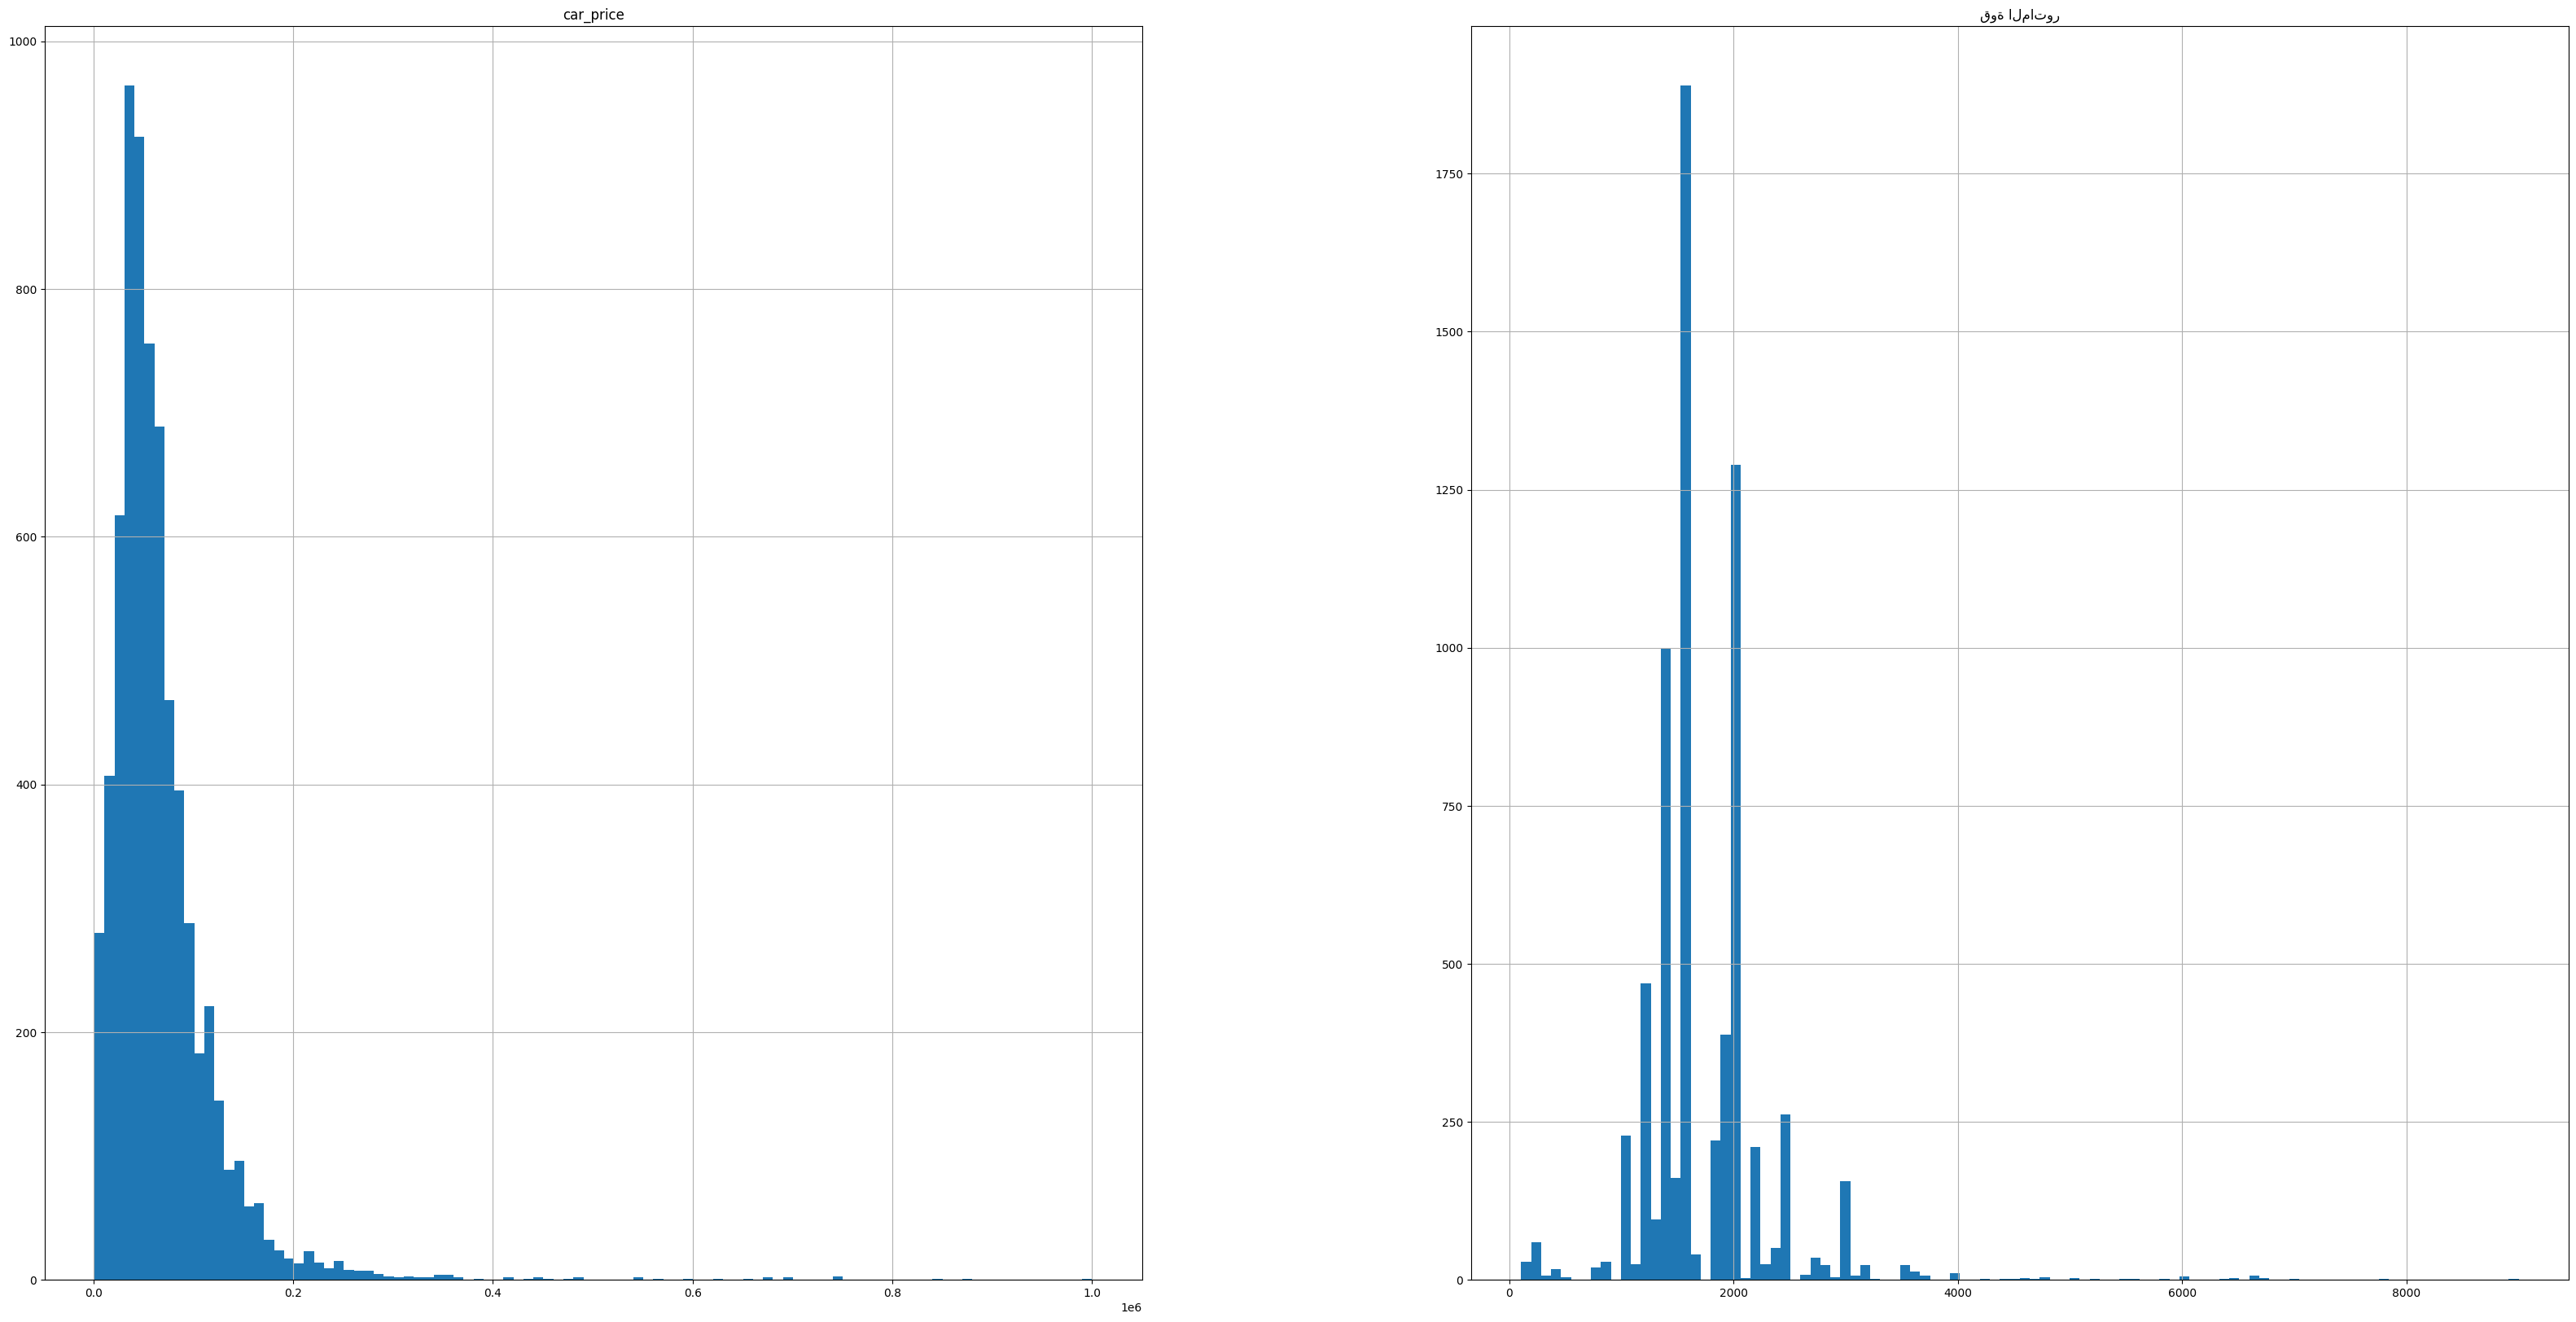

In [135]:
df.hist(bins=100,figsize=(40,20))
plt.show()

remove "موديل سنة" that's clearly unnecessary & make data type int

In [136]:
def extract_year(value):
    return value.split()[-1]
df['car_model'] = df['car_model'].apply(extract_year)
df['car_model']=df['car_model'].astype(int)

remove columns that not affect the price

In [137]:
df=df.drop(columns=["معروضة"])
df=df.drop(columns=["الزجاج"])
df=df.drop(columns=["أصحاب سابقون"])
df=df.drop(columns=["لون السيارة"])

 Data Analysis 

In [138]:
df.isna().sum()

car_name           0
car_model          0
car_price          0
نوع الوقود         0
أصل السيارة        0
رخصة السيارة       0
نوع الجير          0
قوة الماتور        0
عداد السيارة    1941
عدد الركاب       777
وسيلة الدفع        0
إضافات           501
الدفع           5433
dtype: int64

In [139]:
percent_missing = df.isna().sum()/ df.shape[0]*100
percent_missing

car_name         0.000000
car_model        0.000000
car_price        0.000000
نوع الوقود       0.000000
أصل السيارة      0.000000
رخصة السيارة     0.000000
نوع الجير        0.000000
قوة الماتور      0.000000
عداد السيارة    28.277972
عدد الركاب      11.319930
وسيلة الدفع      0.000000
إضافات           7.298951
الدفع           79.152098
dtype: float64

,وسيلة الدفع,count
0,إمكانية التقسيط,2541
1,نقدا فقط,4323


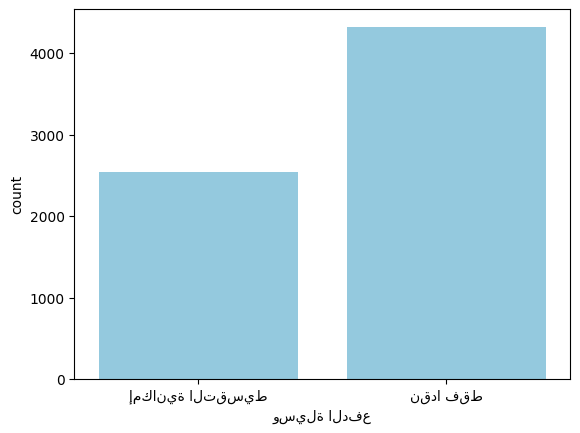

In [140]:
pay_method = df.groupby('وسيلة الدفع').size().reset_index(name='count')
sns.barplot(x="وسيلة الدفع", y='count', data=pay_method, color='skyblue')
pay_method

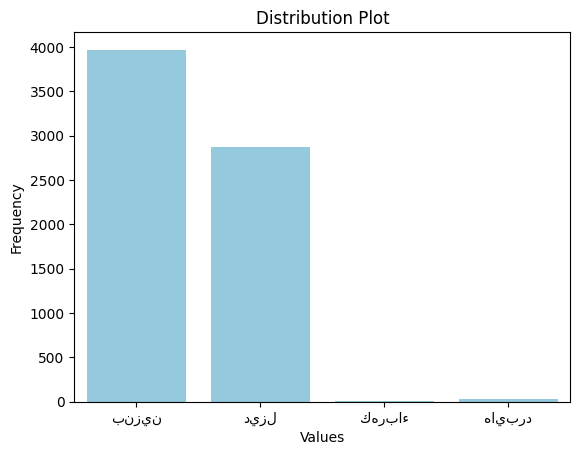

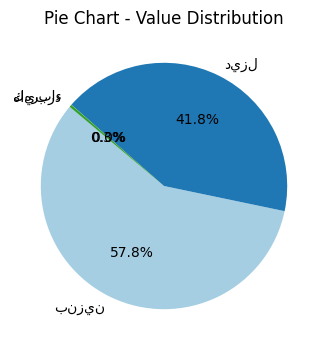

,نوع الوقود,count
0,بنزين,3970
1,ديزل,2870
2,كهرباء,1
3,هايبرد,23


In [141]:
oil_type = df.groupby('نوع الوقود').size().reset_index(name='count')
sns.barplot(x='نوع الوقود', y='count', data=oil_type, color='skyblue')
plt.title('Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.figure(figsize=(4, 4))
plt.pie(oil_type['count'], labels=oil_type['نوع الوقود'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Pie Chart - Value Distribution')
plt.show()
oil_type

,أصل السيارة,count
0,تأجير,128
1,تجاري,189
2,تدريب سياقة,38
3,حكومي,96
4,خصوصي,5833
5,عمومي,580


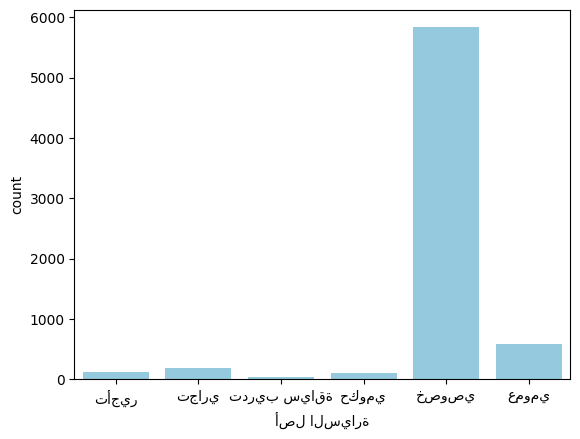

In [142]:
car_type = df.groupby('أصل السيارة').size().reset_index(name='count')
sns.barplot(x='أصل السيارة', y='count', data=car_type, color='skyblue')
car_type


<Axes: xlabel='رخصة السيارة', ylabel='count'>

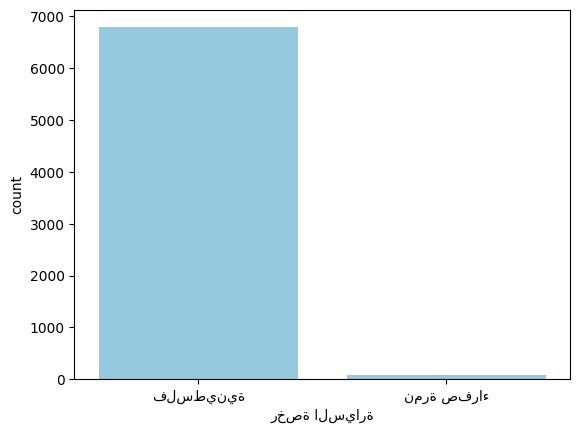

In [143]:
car_id_type = df.groupby('رخصة السيارة').size().reset_index(name='count')
car_id_type
sns.barplot(x='رخصة السيارة', y='count', data=car_id_type, color='skyblue')


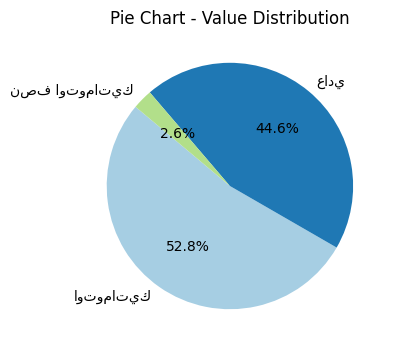

In [144]:
car_gear = df.groupby('نوع الجير').size().reset_index(name='count')
car_gear
plt.figure(figsize=(4, 4))
plt.pie(car_gear['count'], labels=car_gear['نوع الجير'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Pie Chart - Value Distribution')
plt.show()

In [145]:
# car_glass = df.groupby('الزجاج').size().reset_index(name='count')
# sns.barplot(x='الزجاج', y='count', data=car_glass, color='skyblue')
# car_glass

In [146]:
power = df.groupby('قوة الماتور').size().reset_index(name='count')
power

,قوة الماتور,count
0,106,1
1,120,2
2,125,14
3,140,2
4,150,1
...,...,...
139,6600,6
140,6700,3
141,7000,1
142,7777,1


In [147]:
power = df.groupby('عدد الركاب').size().reset_index(name='count')
power

,عدد الركاب,count
0,+1,1
1,000,1
2,1,9
3,1+1,48
4,1+2,2
5,1+7,4
6,1+٤,1
7,1٠4,1
8,2,1
9,2+1,107


In [148]:
price = df.groupby("car_price").size().reset_index(name='count')
price

,car_price,count
0,1111,1
1,1200,1
2,1300,1
3,1500,4
4,1600,1
...,...,...
468,700000,2
469,750000,3
470,850000,1
471,880000,1


<Axes: xlabel='car_price', ylabel='count'>

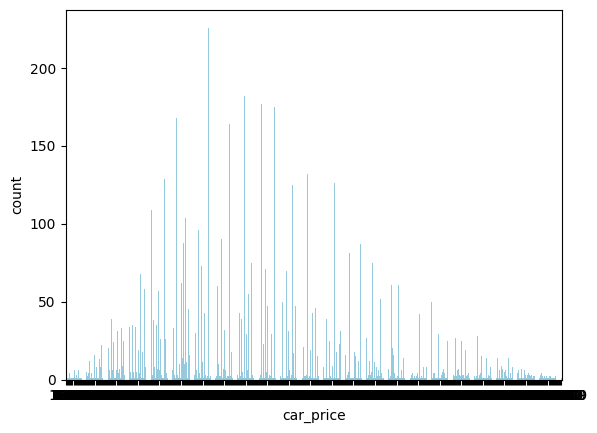

In [149]:
sns.barplot(x="car_price", y='count', data=price, color='skyblue')

drop columns that Na data percentage high

In [150]:
df=df.drop(columns=["الدفع"])


In [151]:
df = df[df['رخصة السيارة'] != 'نمرة صفراء']
df=df.drop(columns=['رخصة السيارة'])
df = df[df["نوع الجير"] != "نصف اوتوماتيك"]
df = df[df['أصل السيارة'] != "تأجير"]
df = df[df['أصل السيارة'] != "تدريب سياقة"]
df = df[df['أصل السيارة'] != "حكومي"]
df = df[df['نوع الوقود'] != "كهرباء"]
df = df[df['نوع الوقود'] != "هايبرد"]


In [152]:
df["عداد السيارة"]

0         75000
2          None
3          شغال
4         38000
5          None
         ...   
6858       None
6860      00000
6861      50000
6862        100
6863    7686866
Name: عداد السيارة, Length: 6338, dtype: object

make "عداد السيارة" numric and remove any charecters 
make vaues under 1000 multiple with 1000 why? becuse most of them was like "50 الف" and by logic no one will sell his car while it under 1000 
also It is common in our country to say "عداد السيارة" ll 150 he means 150000 .
drop Na becuse no way can we use to predict it

In [153]:
df["عداد السيارة"] = df["عداد السيارة"].str.replace('\D', "", regex=True)
df["عداد السيارة"] = df["عداد السيارة"].replace("None", pd.NA)
df["عداد السيارة"] = df["عداد السيارة"].replace("", pd.NA)

df.dropna(subset=["عداد السيارة"], inplace=True)
df["عداد السيارة"] = df["عداد السيارة"].astype("float64")
df["عداد السيارة"] = df["عداد السيارة"].apply(lambda x: x * 1000 if pd.notna(x) and x < 1000 else x)


print(df["عداد السيارة"])



0         75000.0
4         38000.0
6        123456.0
7         50000.0
9         56000.0
          ...    
6857      50000.0
6860          0.0
6861      50000.0
6862     100000.0
6863    7686866.0
Name: عداد السيارة, Length: 4484, dtype: float64


In [154]:
condition = ((df["عداد السيارة"] < 10000) | (df["عداد السيارة"] > 1000000))
df.drop(df[condition].index, inplace=True)


In [155]:
df["عداد السيارة"].describe()

count       3852.000000
mean      127779.109553
std       124164.863146
min        10000.000000
25%        57000.000000
50%        99000.000000
75%       160000.000000
max      1000000.000000
Name: عداد السيارة, dtype: float64

In [156]:
def detect_outliers(group, column):
    q1 = group[column].quantile(0.25)
    q3 = group[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
    return outliers

def process_outliers(group, column):
    outliers = detect_outliers(group, column)
    
    # Drop rows with outliers
    group = group.drop(outliers.index, axis=0)
    
    return group

def replace_to_none(group):
    group = process_outliers(group,"عداد السيارة")
    return group

df = df.groupby('car_name', group_keys=False).apply(replace_to_none)
df["عداد السيارة"]


4692    230000.0
6443    120000.0
1495    200000.0
5945     11000.0
1861    280000.0
          ...   
6506     30000.0
6571     39000.0
6586     45000.0
1829     40000.0
2657    450000.0
Name: عداد السيارة, Length: 3664, dtype: float64

In [157]:
df["عداد السيارة"] = df["عداد السيارة"].astype("int64")


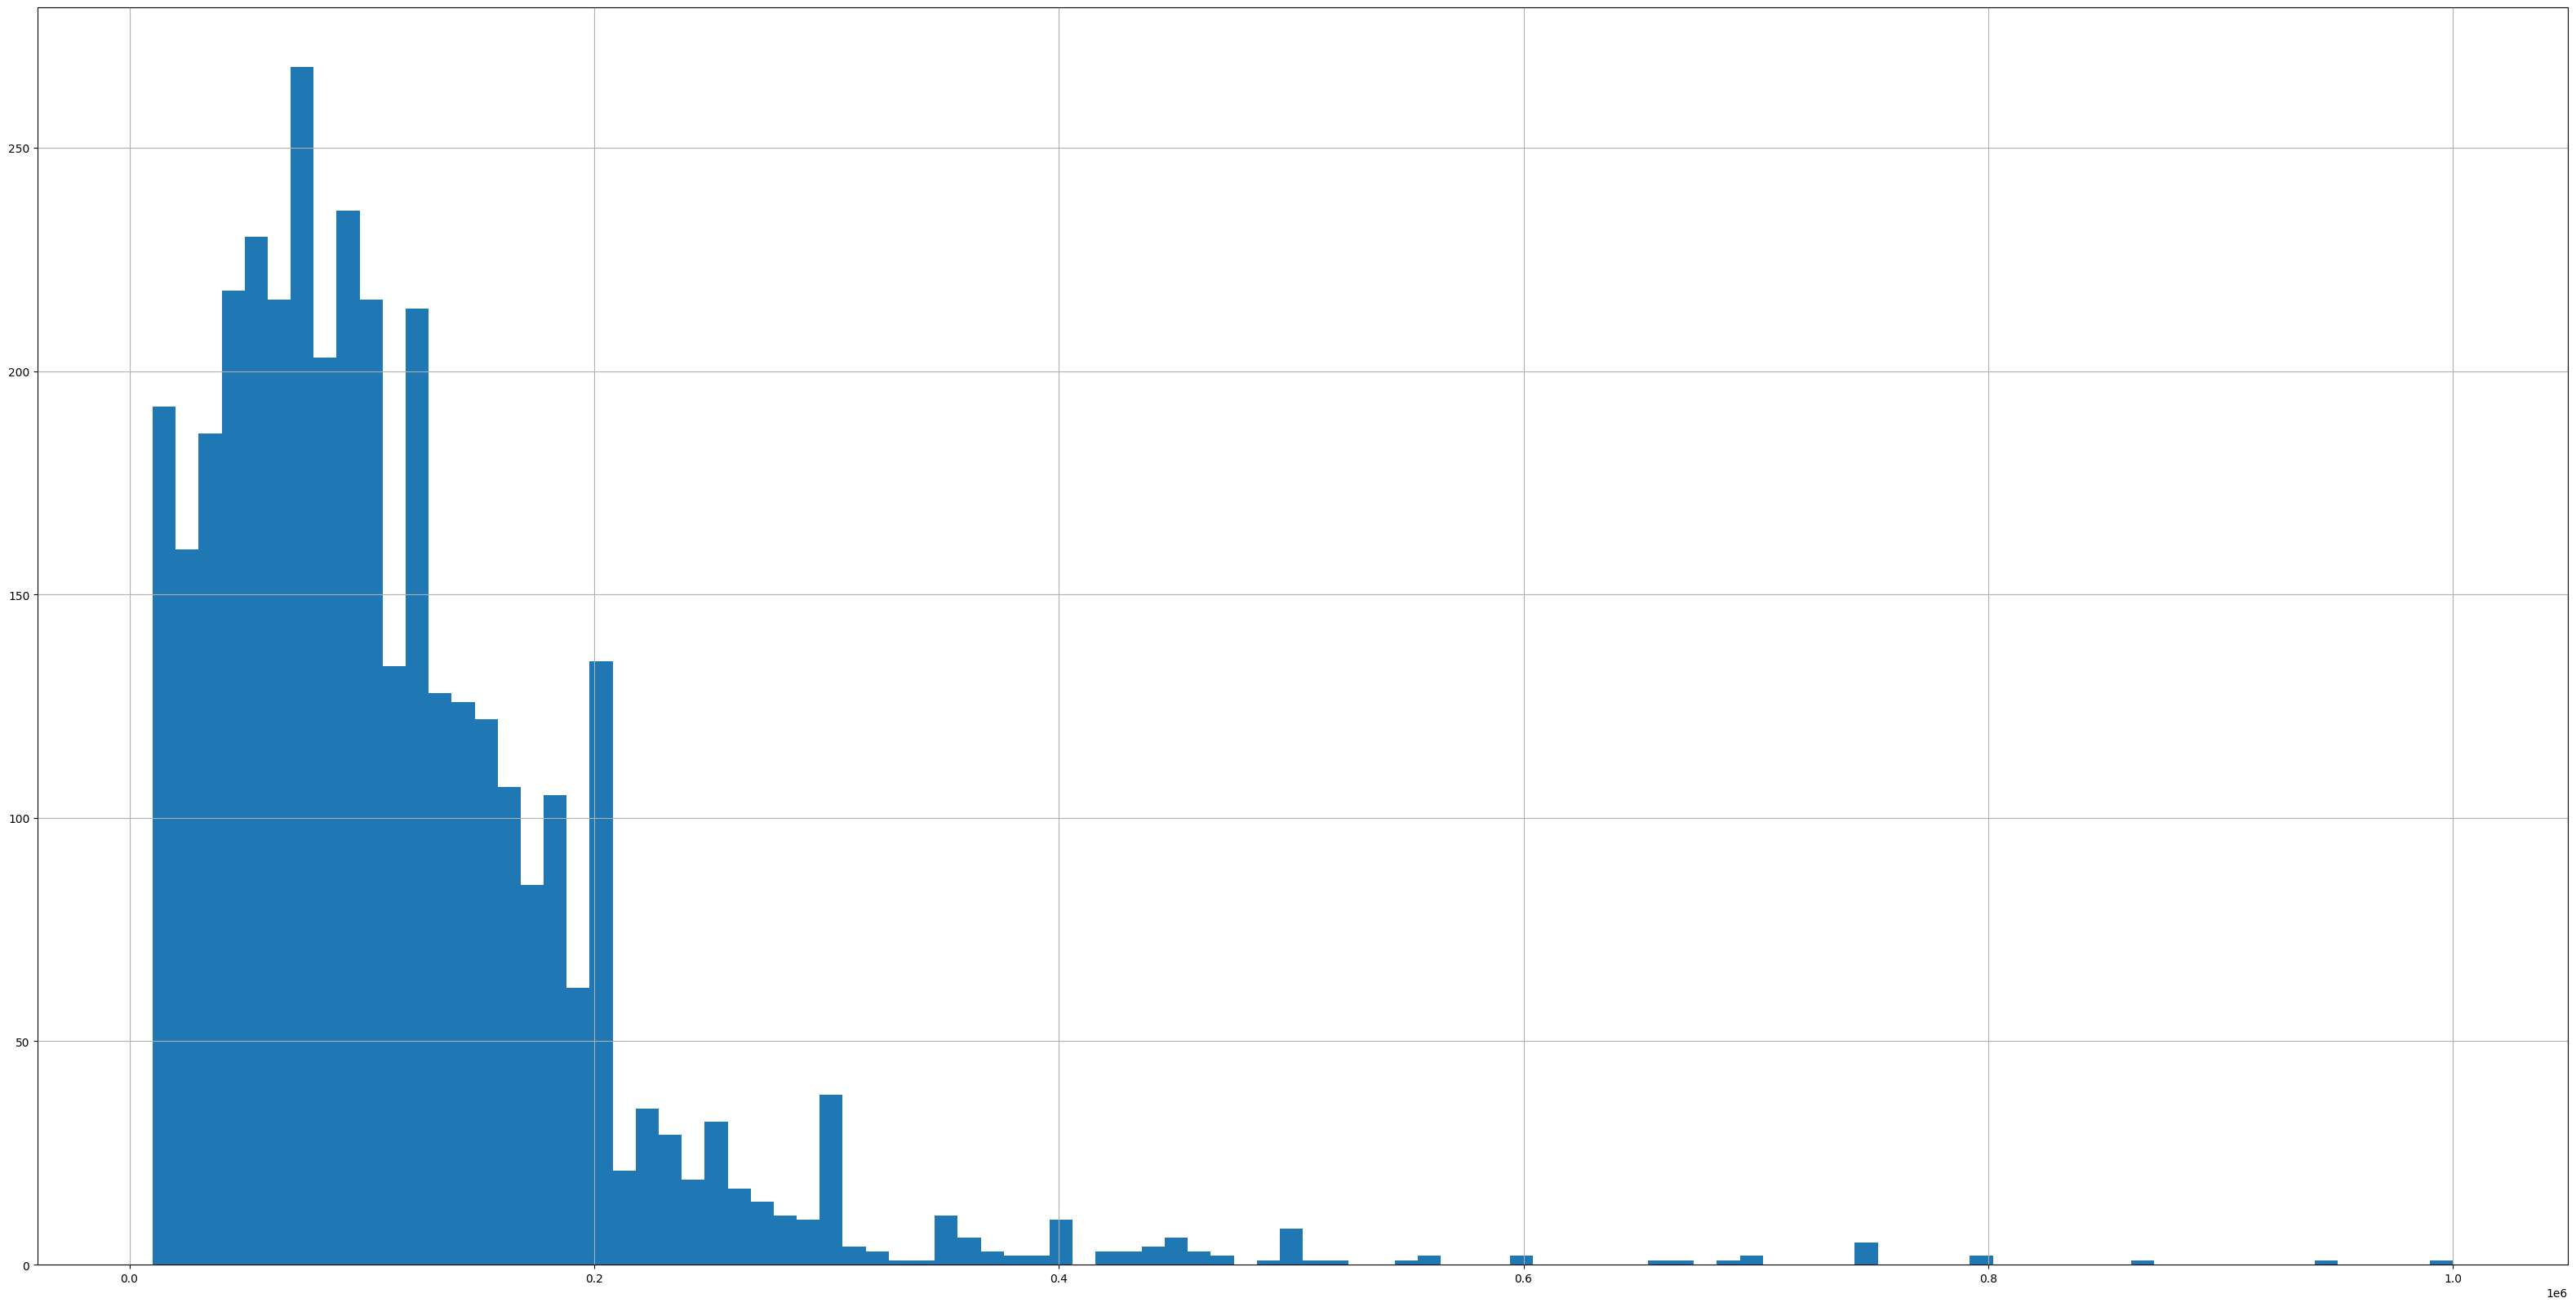

In [158]:
df["عداد السيارة"].hist(bins=100,figsize=(40,20))
plt.show()

change 'عدد الركاب' data type to numric 

In [159]:

def extract_and_sum(s):
    # Use regular expression to find all numeric values
    numbers = re.findall(r'\d+', str(s))
    # Sum the numeric values, or return 0 if there are no numeric values
    return sum(map(int, numbers)) if numbers else None
# Apply the function to the column
df['عدد الركاب'] = df['عدد الركاب'].apply(extract_and_sum)


'car_name' data which have Na on 'عدد الركاب'

In [160]:
condition = df['عدد الركاب'].isna()
filtered_df = df[condition]
car_without_pass_data=filtered_df['car_name'].drop_duplicates()
car_without_pass_data

6120                  أفيكو ديلي
759                   اوبل استرا
3381                 اوبل زافيرا
421                   اوبل كورسا
394                      اودي Q5
                  ...           
5814             هونداي سانتافيه
1099    هونداي سنتافاي فل اضافات
1109                هونداي فيرنا
2640                 هونداي كليك
5339                 هونداي كونا
Name: car_name, Length: 100, dtype: object

replace Na and outlier data in 'عدد الركاب' by mode of each 'car_name'  

In [161]:
df['عدد الركاب'].replace('None', pd.NA, inplace=True)
df['عدد الركاب'].replace(0, pd.NA, inplace=True)
df['عدد الركاب'] = pd.to_numeric(df['عدد الركاب'], errors='coerce')

def replace_none_with_mode(group):
    mode_value = group['عدد الركاب'].mode().iloc[0] if not group['عدد الركاب'].mode().empty else pd.NA
    group['عدد الركاب'].fillna(mode_value, inplace=True)
    return group

df = df.groupby('car_name', group_keys=False).apply(replace_none_with_mode)
df.dropna(subset=['عدد الركاب'], inplace=True)
def replace_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mode_value = group.mode().iloc[0]
    return group.apply(lambda x: mode_value if x < lower_bound or x > upper_bound else x)

df['عدد الركاب'] = df.groupby('car_name')['عدد الركاب'].transform(replace_outliers)


<Axes: xlabel='عدد الركاب', ylabel='count'>

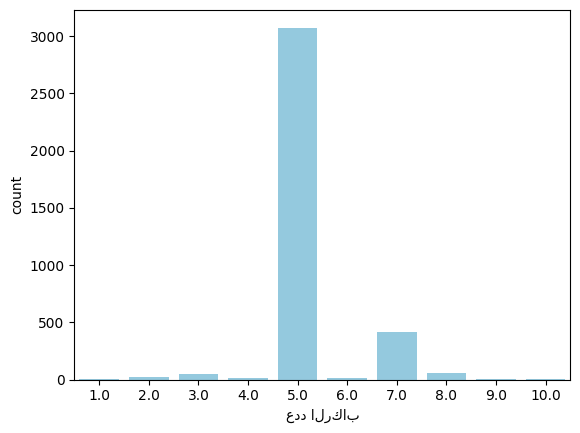

In [162]:

passengers_no = df.groupby('عدد الركاب').size().reset_index(name='count')
sns.barplot(x='عدد الركاب', y='count', data=passengers_no, color='skyblue')

check if the car have 'فتحة سقف'

In [163]:
df["إضافات"]=df["إضافات"].fillna("")
df['فتحة سقف'] = df['إضافات'].apply(lambda x: 1 if 'فتحة سقف' in x else 0)
df=df.drop(columns=["إضافات"])
df


,car_name,car_model,car_price,نوع الوقود,أصل السيارة,نوع الجير,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,فتحة سقف
4692,Dodge رام,2015,125000,ديزل,تجاري,اوتوماتيك,6700,230000,7.0,نقدا فقط,0
6443,Dodge رام,2015,125000,ديزل,خصوصي,اوتوماتيك,6700,120000,5.0,إمكانية التقسيط,0
1495,أفيكو 150E25,2008,125000,ديزل,خصوصي,عادي,4000,200000,3.0,نقدا فقط,0
5945,أفيكو 2000,2000,45000,ديزل,خصوصي,عادي,1518,11000,3.0,إمكانية التقسيط,1
1861,أفيكو 2007,2007,50000,ديزل,تجاري,عادي,3000,280000,3.0,إمكانية التقسيط,0
...,...,...,...,...,...,...,...,...,...,...,...
6506,هونداي كونا,2020,115000,بنزين,خصوصي,اوتوماتيك,1600,30000,5.0,نقدا فقط,1
6571,هونداي كونا,2019,105000,بنزين,خصوصي,اوتوماتيك,1600,39000,5.0,نقدا فقط,0
6586,هونداي كونا,2019,108000,بنزين,خصوصي,اوتوماتيك,1600,45000,5.0,نقدا فقط,0
1829,هونداي ٢٠٠٦,2006,40000,بنزين,خصوصي,اوتوماتيك,1600,40000,5.0,نقدا فقط,0


replace possible noisy data to mode in "قوة الماتور"

In [164]:
def optimize_power_data(group):
    mode_value = group["قوة الماتور"].mode().iloc[0] 
    value_counts = group["قوة الماتور"].value_counts()
    unique_values = value_counts[value_counts == 1].index.tolist()
    unique_values = group["قوة الماتور"].unique()
    for unique_value in unique_values:
        group["قوة الماتور"]= mode_value        
    return group
df = df.groupby('car_name', group_keys=False).apply(optimize_power_data)
df

,car_name,car_model,car_price,نوع الوقود,أصل السيارة,نوع الجير,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,فتحة سقف
4692,Dodge رام,2015,125000,ديزل,تجاري,اوتوماتيك,6700,230000,7.0,نقدا فقط,0
6443,Dodge رام,2015,125000,ديزل,خصوصي,اوتوماتيك,6700,120000,5.0,إمكانية التقسيط,0
1495,أفيكو 150E25,2008,125000,ديزل,خصوصي,عادي,4000,200000,3.0,نقدا فقط,0
5945,أفيكو 2000,2000,45000,ديزل,خصوصي,عادي,1518,11000,3.0,إمكانية التقسيط,1
1861,أفيكو 2007,2007,50000,ديزل,تجاري,عادي,3000,280000,3.0,إمكانية التقسيط,0
...,...,...,...,...,...,...,...,...,...,...,...
6506,هونداي كونا,2020,115000,بنزين,خصوصي,اوتوماتيك,1600,30000,5.0,نقدا فقط,1
6571,هونداي كونا,2019,105000,بنزين,خصوصي,اوتوماتيك,1600,39000,5.0,نقدا فقط,0
6586,هونداي كونا,2019,108000,بنزين,خصوصي,اوتوماتيك,1600,45000,5.0,نقدا فقط,0
1829,هونداي ٢٠٠٦,2006,40000,بنزين,خصوصي,اوتوماتيك,1600,40000,5.0,نقدا فقط,0


 "قوة الماتور" unique values

In [165]:
value_counts = df["قوة الماتور"].value_counts()
unique_values = value_counts[value_counts == 1]
unique_values


قوة الماتور
460     1
5983    1
1518    1
4500    1
5000    1
2996    1
290     1
2300    1
270     1
1995    1
1700    1
340     1
260     1
200     1
390     1
480     1
249     1
4800    1
Name: count, dtype: int64

after manual checking data i found that ican use only the data between 1400 and 6000 from uniqe"قوة الماتور" data

In [166]:

for data in unique_values.index:
    if (data > 6000) or (data < 1400):
        df = df[df["قوة الماتور"] != data]

value_counts = df["قوة الماتور"].value_counts()

unique_values = value_counts[value_counts == 1]

In [167]:
df['car_price'].describe()

count      3642.000000
mean      76778.115047
std       54432.354370
min        1200.000000
25%       45000.000000
50%       65000.000000
75%       95000.000000
max      750000.000000
Name: car_price, dtype: float64

Remove suspicious data 


In [168]:
def detect_outliers(group, column):
    q1 = group[column].quantile(0.25)
    q3 = group[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
    return outliers

def process_outliers(group, column):
    outliers = detect_outliers(group, column)
    
    # Drop rows with outliers
    group = group.drop(outliers.index, axis=0)
    
    return group

def process_outlier(column):
    z_scores = stats.zscore(df[column])
    abs_z_scores = abs(z_scores)
    outliers = (abs_z_scores > 3)
    df[column] = np.where(outliers, df[column].median(), df[column])

def replace_to_none(group):
    group = process_outliers(group, 'car_price')
    return group
process_outlier('car_price')
df = df.groupby('car_name', group_keys=False).apply(replace_to_none)


split car model and car brand

In [169]:
#pd.set_option('display.max_rows', None)
name = df.groupby("car_name").size().reset_index(name='count')
name = name.sort_values(by='car_name')
name

,car_name,count
0,Dodge رام,2
1,أفيكو 150E25,1
2,أفيكو 2000,1
3,أفيكو 2007,1
4,أفيكو IVIECO 50C15CH,1
...,...,...
383,هونداي كليك,11
384,هونداي كوبيه,1
385,هونداي كونا,20
386,هونداي ٢٠٠٦,1


In [170]:
df['car_name'] = df['car_name'].replace({'IVIECO': 'أفيكو', 'BMW': 'بي ام دبليو'}, regex=True)


In [171]:
company_names  = pd.read_json('./carscompany.json')
company_names

,company_name
0,Dodge
1,أفيكو
2,الفا روميو
3,اوبل
4,اودي
5,ايسوزو
6,بي ام دبليو
7,بيجو
8,تويوتا
9,جاجوار


In [172]:
company_names['car_model'] = [[] for _ in range(len(company_names))]  
for index, row in df.iterrows():
    name = row["car_name"]
    for i, company in enumerate(company_names["company_name"]):
        if company in name:
            df.at[index, 'Brands'] = company
            df.at[index, 'car_name'] = name.replace(company, '').strip()
            break
df = df[df["Brands"].notna()]

C:\Users\tareq\AppData\Local\Temp\ipykernel_6188\498402908.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Dodge' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'Brands'] = company


In [173]:
df   

,car_name,car_model,car_price,نوع الوقود,أصل السيارة,نوع الجير,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,فتحة سقف,Brands
4692,رام,2015,125000.0,ديزل,تجاري,اوتوماتيك,6700,230000,7.0,نقدا فقط,0,Dodge
6443,رام,2015,125000.0,ديزل,خصوصي,اوتوماتيك,6700,120000,5.0,إمكانية التقسيط,0,Dodge
1495,150E25,2008,125000.0,ديزل,خصوصي,عادي,4000,200000,3.0,نقدا فقط,0,أفيكو
5945,2000,2000,45000.0,ديزل,خصوصي,عادي,1518,11000,3.0,إمكانية التقسيط,1,أفيكو
1861,2007,2007,50000.0,ديزل,تجاري,عادي,3000,280000,3.0,إمكانية التقسيط,0,أفيكو
...,...,...,...,...,...,...,...,...,...,...,...,...
6506,كونا,2020,115000.0,بنزين,خصوصي,اوتوماتيك,1600,30000,5.0,نقدا فقط,1,هونداي
6571,كونا,2019,105000.0,بنزين,خصوصي,اوتوماتيك,1600,39000,5.0,نقدا فقط,0,هونداي
6586,كونا,2019,108000.0,بنزين,خصوصي,اوتوماتيك,1600,45000,5.0,نقدا فقط,0,هونداي
1829,٢٠٠٦,2006,40000.0,بنزين,خصوصي,اوتوماتيك,1600,40000,5.0,نقدا فقط,0,هونداي


Remove suspicious data **cars with suspicious names**

In [174]:
def convert_arabic_to_western(num):
    arabic_numerals = '٠١٢٣٤٥٦٧٨٩'
    western_numerals = '0123456789'
    mapping = str.maketrans(arabic_numerals, western_numerals)
    return num.translate(mapping)

# Use .loc to apply the conversion without triggering the warning
df.loc[:, 'car_name'] = df['car_name'].apply(convert_arabic_to_western)

# Use .loc to filter rows based on the condition
df = df.loc[df['car_name'] != df['car_model']].copy()

df.reset_index(drop=True, inplace=True)


In [175]:
import pandas as pd

# Assuming your original DataFrame is named 'df'
# Create an empty list to store dictionaries
company_data = []

# Create a set to keep track of processed companies
processed_companies = set()

# Iterate through unique companies (Brands) in the original DataFrame
for company in df['Brands'].unique():
    # Check if the company has already been processed
    if company not in processed_companies:
        # Mark the company as processed
        processed_companies.add(company)

        # Filter the original DataFrame for the current company
        company_df = df[df['Brands'] == company]

        # Remove duplicate car models within the current company
        unique_models = company_df['car_name'].unique().tolist()

        # Append the company name and unique models list to the list of dictionaries
        company_data.append({'company_name': company, 'models': unique_models})

# Create a new DataFrame from the list of dictionaries
company_names = pd.DataFrame(company_data)

# Display the resulting DataFrame
company_names.to_json('car_brands.json', orient='records', lines=True, force_ascii=False)


incodeing none numric data

In [176]:
# df["الزجاج"] = df['الزجاج'].apply(lambda x: 1 if "الكتروني" in x else 0)

In [177]:
fuel_le = LabelEncoder()
fuel_feature_arr = fuel_le.fit_transform(df["نوع الوقود"])
fuel_feature_arr = fuel_feature_arr.reshape(-1, 1)  # Reshape to a 2D array
fuel_ohe = OneHotEncoder()
fuel_feature_arr = fuel_ohe.fit_transform(fuel_feature_arr).toarray()
fuel_feature_labels = [ str(cls_label) for cls_label in fuel_le.classes_]
fuel_features = pd.DataFrame(fuel_feature_arr, columns=fuel_feature_labels)
df = pd.concat([df, fuel_features], axis=1)
df = df.drop("نوع الوقود", axis=1)

In [178]:
gear_le = LabelEncoder()
gear_feature_arr = gear_le.fit_transform(df["نوع الجير"])
gear_feature_arr = gear_feature_arr.reshape(-1, 1)  # Reshape to a 2D array
gear_ohe = OneHotEncoder()
gear_feature_arr = gear_ohe.fit_transform(gear_feature_arr).toarray()
gear_feature_labels = [  str(cls_label) for cls_label in gear_le.classes_]
gear_features = pd.DataFrame(gear_feature_arr, columns=gear_feature_labels)
df = pd.concat([df, gear_features], axis=1)
df = df.drop("نوع الجير", axis=1)


In [179]:
car_type_le = LabelEncoder()
car_type_feature_arr = car_type_le.fit_transform(df["أصل السيارة"])
car_type_feature_arr = car_type_feature_arr.reshape(-1, 1)  # Reshape to a 2D array
car_type_ohe = OneHotEncoder()
car_type_feature_arr = car_type_ohe.fit_transform(car_type_feature_arr).toarray()
car_type_feature_labels = [ str(cls_label) for cls_label in car_type_le.classes_]
car_type_features = pd.DataFrame(car_type_feature_arr, columns=car_type_feature_labels)
df = pd.concat([df, car_type_features], axis=1)
df = df.drop("أصل السيارة", axis=1)



In [180]:
pay_method_le = LabelEncoder()
pay_method_feature_arr = pay_method_le.fit_transform(df["وسيلة الدفع"])
pay_method_feature_arr = pay_method_feature_arr.reshape(-1, 1)  # Reshape to a 2D array
pay_method_ohe = OneHotEncoder()
pay_method_feature_arr = pay_method_ohe.fit_transform(pay_method_feature_arr).toarray()
pay_method_feature_labels = [ str(cls_label) for cls_label in pay_method_le.classes_]
pay_method_features = pd.DataFrame(pay_method_feature_arr, columns=pay_method_feature_labels)
df = pd.concat([df, pay_method_features], axis=1)
df = df.drop("وسيلة الدفع", axis=1)



In [181]:

# Assuming 'Brand' and 'Model' are columns in your DataFrame
df['Brand_Model'] = df['Brands'] + '_' + df['car_name']

# Label Encoding
brand_model_le = LabelEncoder()
brand_model_feature_arr = brand_model_le.fit_transform(df['Brand_Model'])

# Reshape the array
brand_model_feature_arr = brand_model_feature_arr.reshape(-1, 1)

# One-Hot Encoding
brand_model_ohe = OneHotEncoder()
brand_model_feature_arr = brand_model_ohe.fit_transform(brand_model_feature_arr).toarray()

# Create DataFrame with One-Hot Encoded Columns
brand_model_feature_labels = [str(cls_label) for cls_label in brand_model_le.classes_]
brand_model_features = pd.DataFrame(brand_model_feature_arr, columns=brand_model_feature_labels)

# Concatenate with the Original DataFrame
df = pd.concat([df, brand_model_features], axis=1)

# Drop the Original Categorical Columns
df = df.drop(['Brands', 'car_name', 'Brand_Model'], axis=1)

In [182]:
df

,car_model,car_price,قوة الماتور,عداد السيارة,عدد الركاب,فتحة سقف,بنزين,ديزل,اوتوماتيك,عادي,...,هونداي_جيتس,هونداي_سانتافيه,هونداي_سنتافيه,هونداي_سوناتا,هونداي_فيرنا,هونداي_فيلوستر,هونداي_فينيو,هونداي_كليك,هونداي_كوبيه,هونداي_كونا
0,2015,125000.0,6700,230000,7.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,125000.0,6700,120000,5.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008,125000.0,4000,200000,3.0,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,45000.0,1518,11000,3.0,1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,50000.0,3000,280000,3.0,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2020,115000.0,1600,30000,5.0,1,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3496,2019,105000.0,1600,39000,5.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3497,2019,108000.0,1600,45000,5.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3498,2006,40000.0,1600,40000,5.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


X=df.drop(columns=["car_price"])
y=df["car_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [184]:

poly_features = PolynomialFeatures(degree=1)
X_poly = poly_features.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
print(poly_reg.score(X_poly, y_train))


0.8414223346376957


In [185]:

knn_reg = KNeighborsRegressor(n_neighbors=2)  
knn_reg.fit(X_train, y_train)
print(knn_reg.score(X_train, y_train))


0.786477986339634


In [186]:

dt_reg = DecisionTreeRegressor(max_depth=5)  
dt_reg.fit(X_train, y_train)
print(dt_reg.score(X_train, y_train))

0.6921274720881059


In [187]:

X=df.drop(columns=["car_price"])
y=df["car_price"]

PR =  LinearRegression()
PR.fit( X,y)

LinearRegression()

In [188]:
import pickle
pickle.dump(PR,open('./pr.sav',"wb"))

In [189]:
df

,car_model,car_price,قوة الماتور,عداد السيارة,عدد الركاب,فتحة سقف,بنزين,ديزل,اوتوماتيك,عادي,...,هونداي_جيتس,هونداي_سانتافيه,هونداي_سنتافيه,هونداي_سوناتا,هونداي_فيرنا,هونداي_فيلوستر,هونداي_فينيو,هونداي_كليك,هونداي_كوبيه,هونداي_كونا
0,2015,125000.0,6700,230000,7.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,125000.0,6700,120000,5.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008,125000.0,4000,200000,3.0,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,45000.0,1518,11000,3.0,1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,50000.0,3000,280000,3.0,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2020,115000.0,1600,30000,5.0,1,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3496,2019,105000.0,1600,39000,5.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3497,2019,108000.0,1600,45000,5.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3498,2006,40000.0,1600,40000,5.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
df.to_csv('df.csv')

In [193]:
# Example: Select rows where the value in the 'column_name' is equal to 5
result = df.loc[df['Dodge_رام'] == 1]


In [194]:
result

,car_model,car_price,قوة الماتور,عداد السيارة,عدد الركاب,فتحة سقف,بنزين,ديزل,اوتوماتيك,عادي,...,هونداي_جيتس,هونداي_سانتافيه,هونداي_سنتافيه,هونداي_سوناتا,هونداي_فيرنا,هونداي_فيلوستر,هونداي_فينيو,هونداي_كليك,هونداي_كوبيه,هونداي_كونا
0,2015,125000.0,6700,230000,7.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,125000.0,6700,120000,5.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
